# Toy example
This notebook will solve a non-linear separable problem. We will try 2 hypothesis
* Softmax linear classifer
* Neural Networl (2 layer)

This code is based on cs231n notes, for the original work refer here:

Reference:
1. http://cs231n.github.io/neural-networks-case-study/

In [11]:
# Import needed libraries (Numpy and matplotlib)
import numpy as np
import matplotlib.pyplot as plt

## Create the data
We will create a spiral dataset.
* https://www.quora.com/What-is-the-general-equation-of-a-2-d-spiral-in-x-y-plane-centered-at-origin

Input shape: (300, 2)
Target(y) shape: (300, 2)
Training with 300 samples


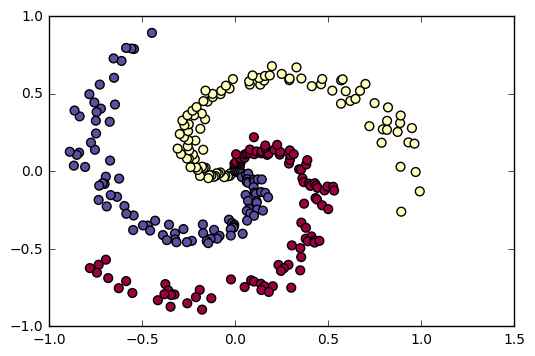

In [18]:
# Define dimensions, number of classes, and number of points
N = 100
D = 2
K = 3

X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels

# Basically out input vector is a matrix [100x2]
print("Input shape:", X.shape)
print("Target(y) shape:", X.shape)

# Notice that in python 3 xrange is called range
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

num_examples = X.shape[0]
print("Training with %d samples"%(num_examples))

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

## First model (Softmax linear classifer)

In [3]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))
print("Weights\n",W)

# compute class scores for a linear classifier
scores = np.dot(X, W) + b

print("Score shape:",scores.shape)

Weights
 [[ 0.00768572  0.00819889  0.00643391]
 [-0.01356558  0.01427826  0.00137576]]
Score shape: (300, 3)


### Training

In [13]:
# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# 200 epochs (complete cycle on the training-set)
for i in range(200):
  
    # Forward propagation with current set of weights and biases
    # Notice that there are no non-linearities it's a simple linear classifer
    scores = np.dot(X, W) + b 

    # compute the softmax activation
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

    # compute the multi-class cross entropy loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    
    # Compute full loss (Average and regularization)
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    
    # Print loss each 100 elements
    if i % 25 == 0:
        print ("iteration %d: loss %f" % (i, loss))

    # compute the gradient of the cross-entropy w.r.t to scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)

    dW += reg*W # regularization gradient

    # perform a parameter update (Simple gradient descent)
    W += -step_size * dW
    b += -step_size * db

iteration 0: loss 0.758563
iteration 25: loss 0.758563
iteration 50: loss 0.758562
iteration 75: loss 0.758562
iteration 100: loss 0.758562
iteration 125: loss 0.758562
iteration 150: loss 0.758562
iteration 175: loss 0.758562



Softmax classifer: training accuracy: 0.54


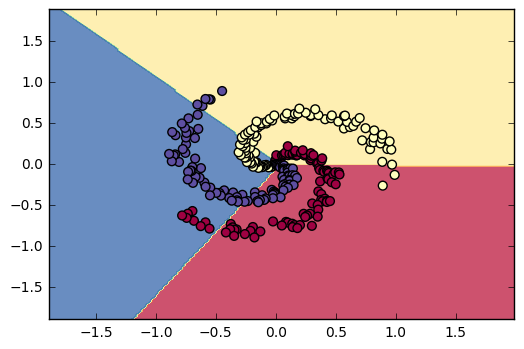

In [19]:
# Evaluate trained model
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('\nSoftmax classifer: training accuracy: %.2f' % (np.mean(predicted_class == y)))

# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Sample our hypothesis on all gridspace
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

# Plot
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## Use a different hypothesis/model
Now we will try a 2 layer neural network.
* First layer (input layer): 100 neurons (Relu Activation)
* Second layer (output layer): 3 neurons (Softmax Activation)

In [20]:
# initialize parameters randomly
h = 100 # size of hidden layer

# Initialize weigts and bias for layers 1,2
W1 = 0.01 * np.random.randn(D,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

print("W1 shape:", W1.shape)
print("W2 shape:", W2.shape)

W1 shape: (2, 100)
W2 shape: (100, 3)


In [22]:
# some hyperparameters (gradient descent alpha and regularization)
step_size = 0.2
reg = 1e-6 # regularization strength

# Run for 10000 epochs
for i in range(10000):
  
    # Forward propagation
    
    # First layer
    z = np.dot(X, W1) + b1
    hidden_layer = np.maximum(0, z)
    scores = np.dot(hidden_layer, W2) + b2

    # Second layer
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

    # Calculate loss
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W1*W1) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print ("iteration %d: loss %f" % (i, loss))

    # Backpropagation
    # compute the loss gradient w.r.t to scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW1 = np.dot(X.T, dhidden)
    db1 = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW1 += reg * W1

    # perform a parameter update
    W1 += -step_size * dW1
    b1 += -step_size * db1
    W2 += -step_size * dW2
    b2 += -step_size * db2

iteration 0: loss 0.058533
iteration 1000: loss 0.053723
iteration 2000: loss 0.049673
iteration 3000: loss 0.046277
iteration 4000: loss 0.043475
iteration 5000: loss 0.041152
iteration 6000: loss 0.039210
iteration 7000: loss 0.037515
iteration 8000: loss 0.036068
iteration 9000: loss 0.034676


training accuracy: 0.99


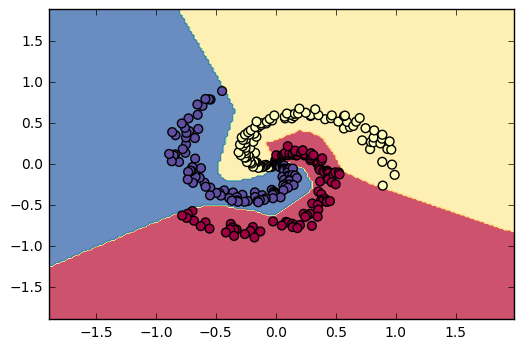

In [23]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()